In [3]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
generator_path = '../data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']
detector_spectrums = spectrums

gebless_spectrums = generator_path+'gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

In [5]:
filenames_path = '../filenames.csv'
filenames = pd.read_csv(filenames_path)['name']

In [6]:
# make dataframe
df = pd.DataFrame()
df['filename'] = filenames
df['detector'] = detector_spectrums[:, 0].tolist()
df['gebless'] = gebless_spectrums[:, 0].tolist()
df

,filename,detector,gebless
0,tnm_c,"[0.00017666, 1.19e-07, 0.000105117, 6.0493e-05...","[3.3e-08, 0.00035059, 3.962e-06, 6.379e-06, 6...."
1,tnm_si,"[0.000332717, 2.41e-07, 0.000197307, 0.0001127...","[9.3e-08, 0.000659009, 7.946e-06, 1.0843e-05, ..."
2,tnm_al203,"[0.000292088, 2e-07, 0.000174911, 9.8536e-05, ...","[8.1e-08, 0.00058002, 6.398e-06, 9.749e-06, 1...."
3,tnm_c50si50,"[0.000257817, 1.81e-07, 0.000152064, 8.6541e-0...","[5.6e-08, 0.000509252, 5.556e-06, 8.224e-06, 9..."


In [7]:
def plott(spectrums, suptitle):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(suptitle)
    c_center = 4.44
    c_width = 0.15
    c_window = [c_center - c_width, c_center + c_width]
    c_maxs = []
    c_mins = []
    for i in range(len(spectrums)):
        axs[0, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        c_maxs.append(np.max(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        c_mins.append(np.min(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        # draw stem plots for spectrum
    axs[0, 1].legend()
    axs[0, 1].set_title('Carbon Window (Zoomed)')
    axs[0, 1].set_xlabel('MeV')
    axs[0, 1].set_ylabel('Intensity')
    axs[0, 1].set_xlim(c_center - c_width, c_center + c_width)
    axs[0, 1].set_ylim(np.min(c_mins), np.max(c_maxs))

    # Third subplot
    si_center = 1.78
    si_width = 0.15
    si_window = [si_center - si_width, si_center + si_width]
    si_maxs = []
    si_mins = []
    for i in range(len(spectrums)):
        axs[1, 0].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        si_maxs.append(np.max(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_mins.append(np.min(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
    axs[1, 0].legend()
    axs[1, 0].set_title('Silicone Window (Zoomed)')
    axs[1, 0].set_xlabel('MeV')
    axs[1, 0].set_ylabel('Intensity')
    axs[1, 0].set_xlim(si_center - si_width, si_center + si_width)
    axs[1, 0].set_ylim(np.min(si_mins), np.max(si_maxs))

    # Fourth subplot
    low_window = [0.1, 1]
    low_maxs = []
    low_mins = []
    for i in range(len(spectrums)):
        axs[1, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        low_maxs.append(np.max(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
        low_mins.append(np.min(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
    axs[1, 1].legend()
    axs[1, 1].set_title('Low Energy (Zoomed)')
    axs[1, 1].set_xlabel('MeV')
    axs[1, 1].set_ylabel('Intensity')
    axs[1, 1].set_xlim(low_window[0], low_window[1])
    axs[1, 1].set_ylim(np.min(low_mins), np.max(low_maxs))

    # First subplot
    for i in range(len(spectrums)):
        axs[0, 0].plot(bins, spectrums[i][0], label=filenames[i])
    axs[0, 0].legend()
    axs[0, 0].set_title('Spectrums')
    axs[0, 0].set_xlabel('MeV')
    axs[0, 0].set_ylabel('Intensity')
    # draw squares around the zoomed regions
    for ax in axs:
        for a in ax:
            a.add_patch(plt.Rectangle((0.1, np.min(low_mins)), 0.9, np.max(low_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((si_center - si_width, np.min(si_mins)), si_width*2, np.max(si_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((c_center - c_width, np.min(c_mins)), c_width*2, np.max(c_maxs), fill=None, edgecolor='red'))
    # label the zoomed regions
    axs[0, 0].text((low_window[0]+low_window[1])/2, np.max(low_maxs), 'Low Energy', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(c_center, np.max(c_maxs), 'Carbon', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(si_center, np.max(si_maxs), 'Silicone', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')

    # log_toggle = [True, True, True, True]
    log_toggle = [False, False, False, False]

    for i in range(log_toggle.__len__()):
        if log_toggle[i]:
            axs[i//2, i%2].set_yscale('log')

    # log scale
    plt.tight_layout()
    plt.show()


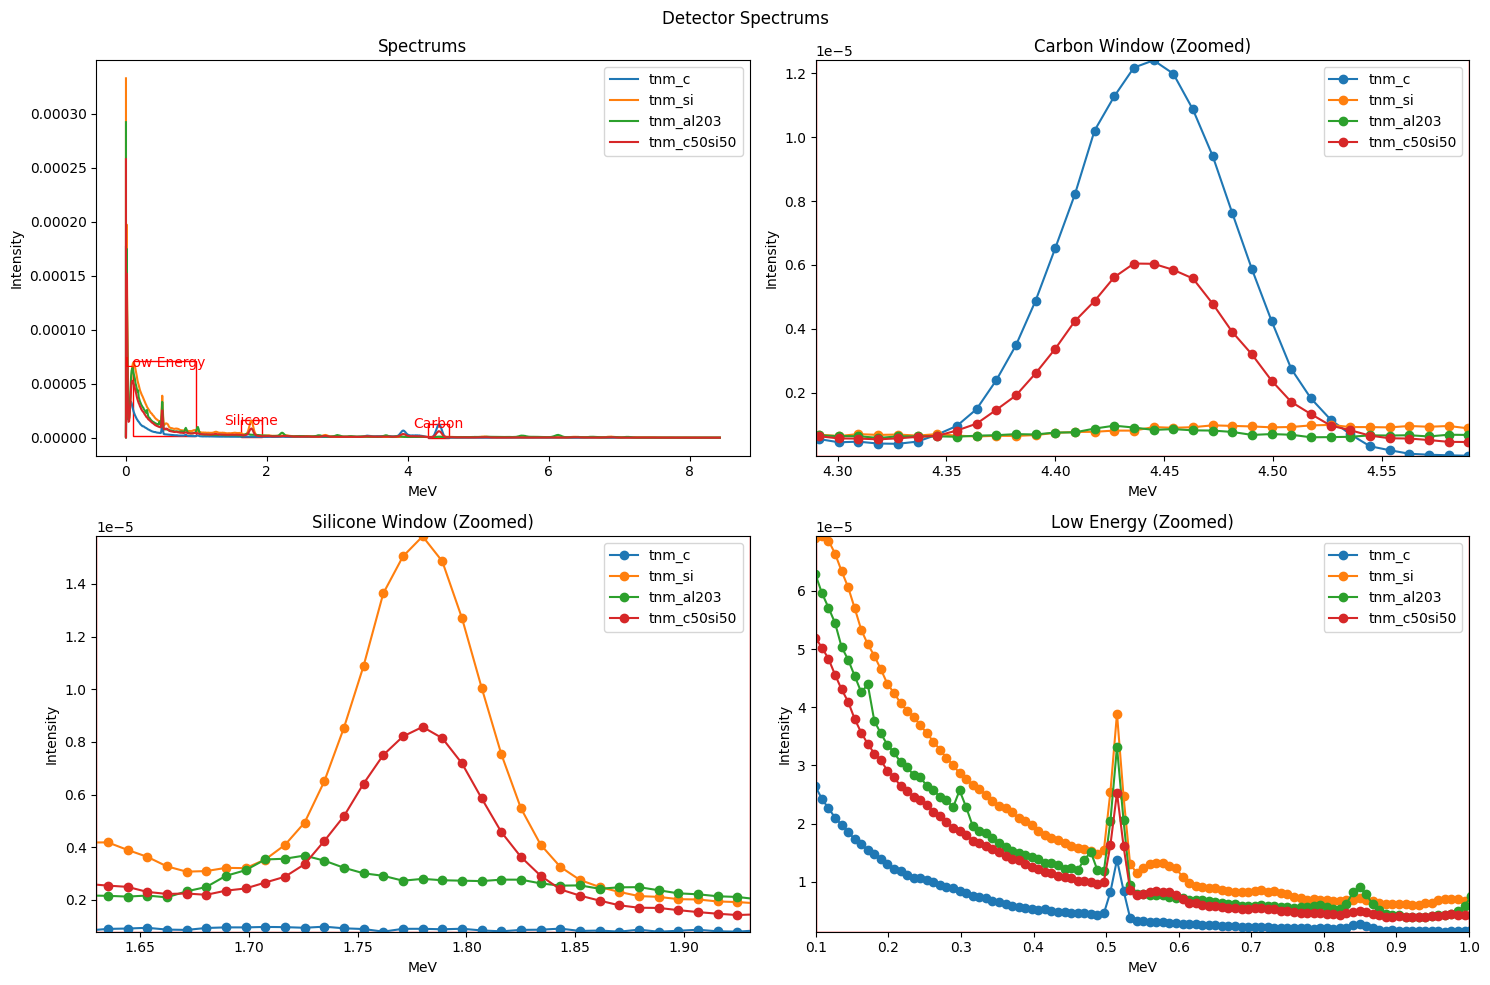

In [8]:
plott(detector_spectrums, 'Detector Spectrums')

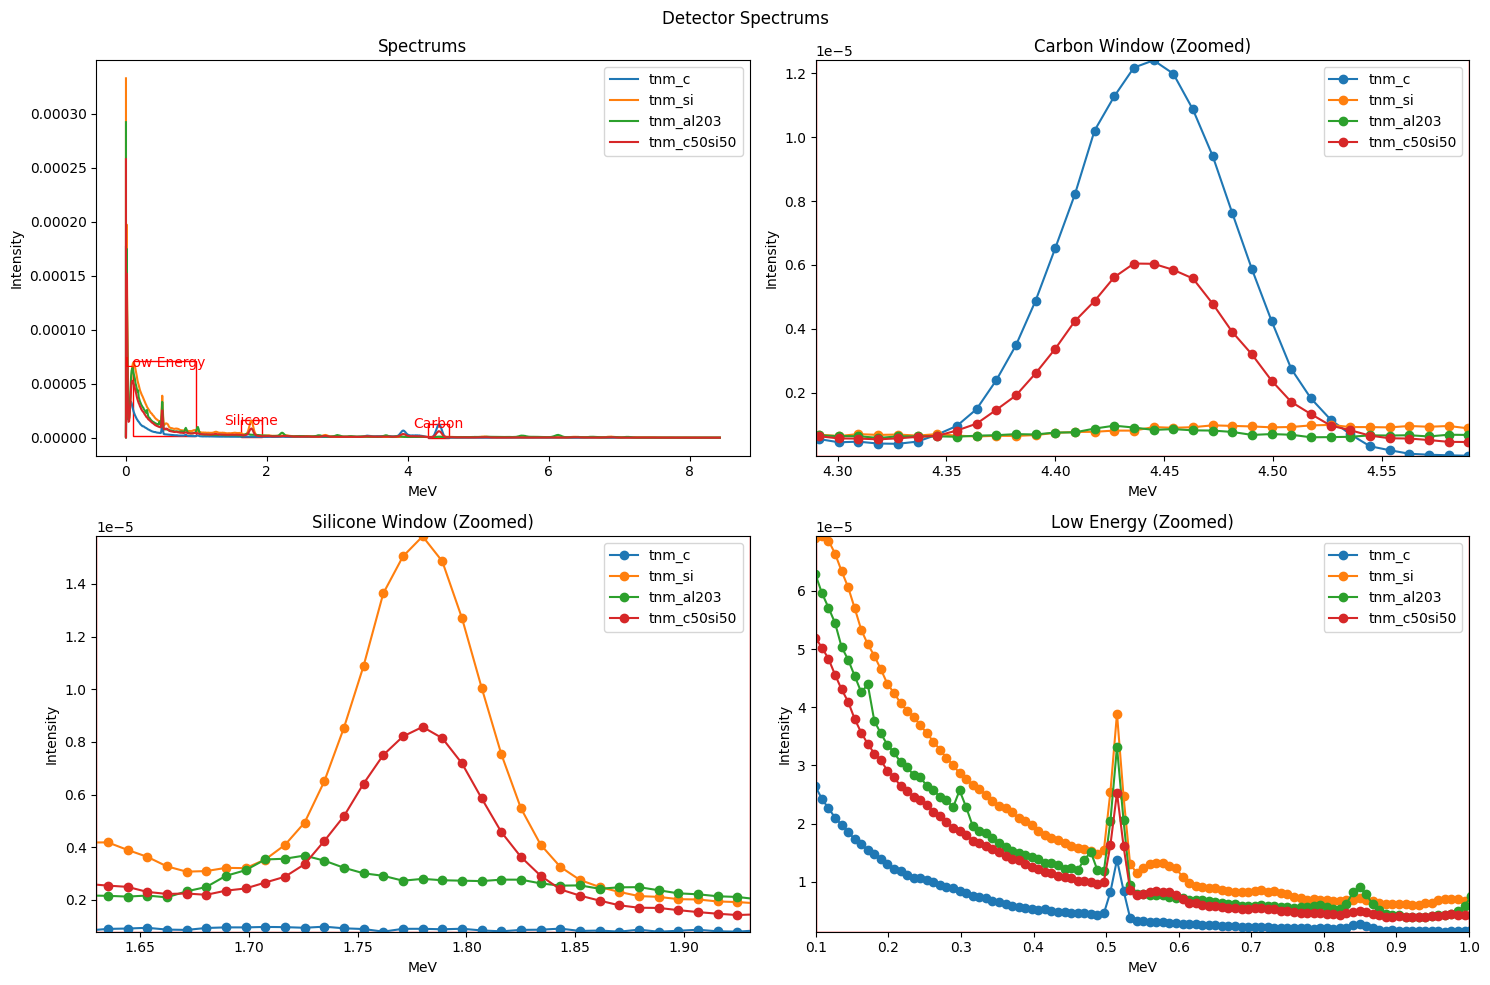

In [18]:
plott(detector_spectrums, 'Detector Spectrums')

In [9]:
detector_spectrums[:, 0, :].shape

(4, 935)

In [10]:
# apply singular value decomposition to the data
U, s, V = np.linalg.svd(detector_spectrums[:, 0, :], full_matrices=False)
svds = V.reshape(V.shape[0], 1, V.shape[1])

In [11]:
U.shape

(4, 4)

In [12]:
U, s, V = np.linalg.svd(detector_spectrums[:, 0, :], full_matrices=False)
# result = V.reshape(V.shape[0], 1, V.shape[1])

In [13]:
U, s, V = np.linalg.svd(detector_spectrums[:, 0, :], full_matrices=True)
print(V.shape)
print(V[:5, :5])
# print(U.shape)
# print(s.shape)

U, s, V = np.linalg.svd(detector_spectrums[:, 0, :], full_matrices=False)
print(V.shape)
print(V[:5, :5])
# print(U.shape)
# print(s.shape)


(935, 935)
[[-6.77795327e-01 -4.76328778e-04 -4.02744036e-01 -2.29136461e-01
  -8.60363949e-02]
 [ 2.25370421e-01  3.90883053e-05  1.37065080e-01  8.28849915e-02
   4.51756511e-02]
 [ 8.67027879e-02  2.68422591e-04  2.35066711e-03  4.13015326e-02
   1.11727694e-02]
 [ 2.48039406e-02 -5.66689383e-05 -9.52368249e-02 -8.70012858e-02
  -1.18233861e-01]
 [-7.07156691e-02  2.02481232e-02 -1.94616341e-02 -1.29699042e-01
   9.82553471e-01]]
(4, 935)
[[-6.77795327e-01 -4.76328778e-04 -4.02744036e-01 -2.29136461e-01
  -8.60363949e-02]
 [ 2.25370421e-01  3.90883053e-05  1.37065080e-01  8.28849915e-02
   4.51756511e-02]
 [ 8.67027879e-02  2.68422591e-04  2.35066711e-03  4.13015326e-02
   1.11727694e-02]
 [ 2.48039406e-02 -5.66689383e-05 -9.52368249e-02 -8.70012858e-02
  -1.18233861e-01]]


In [14]:
s.shape

(4,)

In [15]:
V.reshape(V.shape[0], 1, V.shape[1])

array([[[-6.77795327e-01, -4.76328778e-04, -4.02744036e-01, ...,
         -2.46780187e-04, -2.34371538e-04, -2.19081475e-04]],

       [[ 2.25370421e-01,  3.90883053e-05,  1.37065080e-01, ...,
         -8.85168929e-04, -9.89203422e-04, -8.14679619e-04]],

       [[ 8.67027879e-02,  2.68422591e-04,  2.35066711e-03, ...,
         -6.75102634e-04, -3.09632617e-04,  2.91193416e-05]],

       [[ 2.48039406e-02, -5.66689383e-05, -9.52368249e-02, ...,
         -4.33267434e-04, -1.18033476e-03,  8.06700549e-04]]],
      shape=(4, 1, 935))

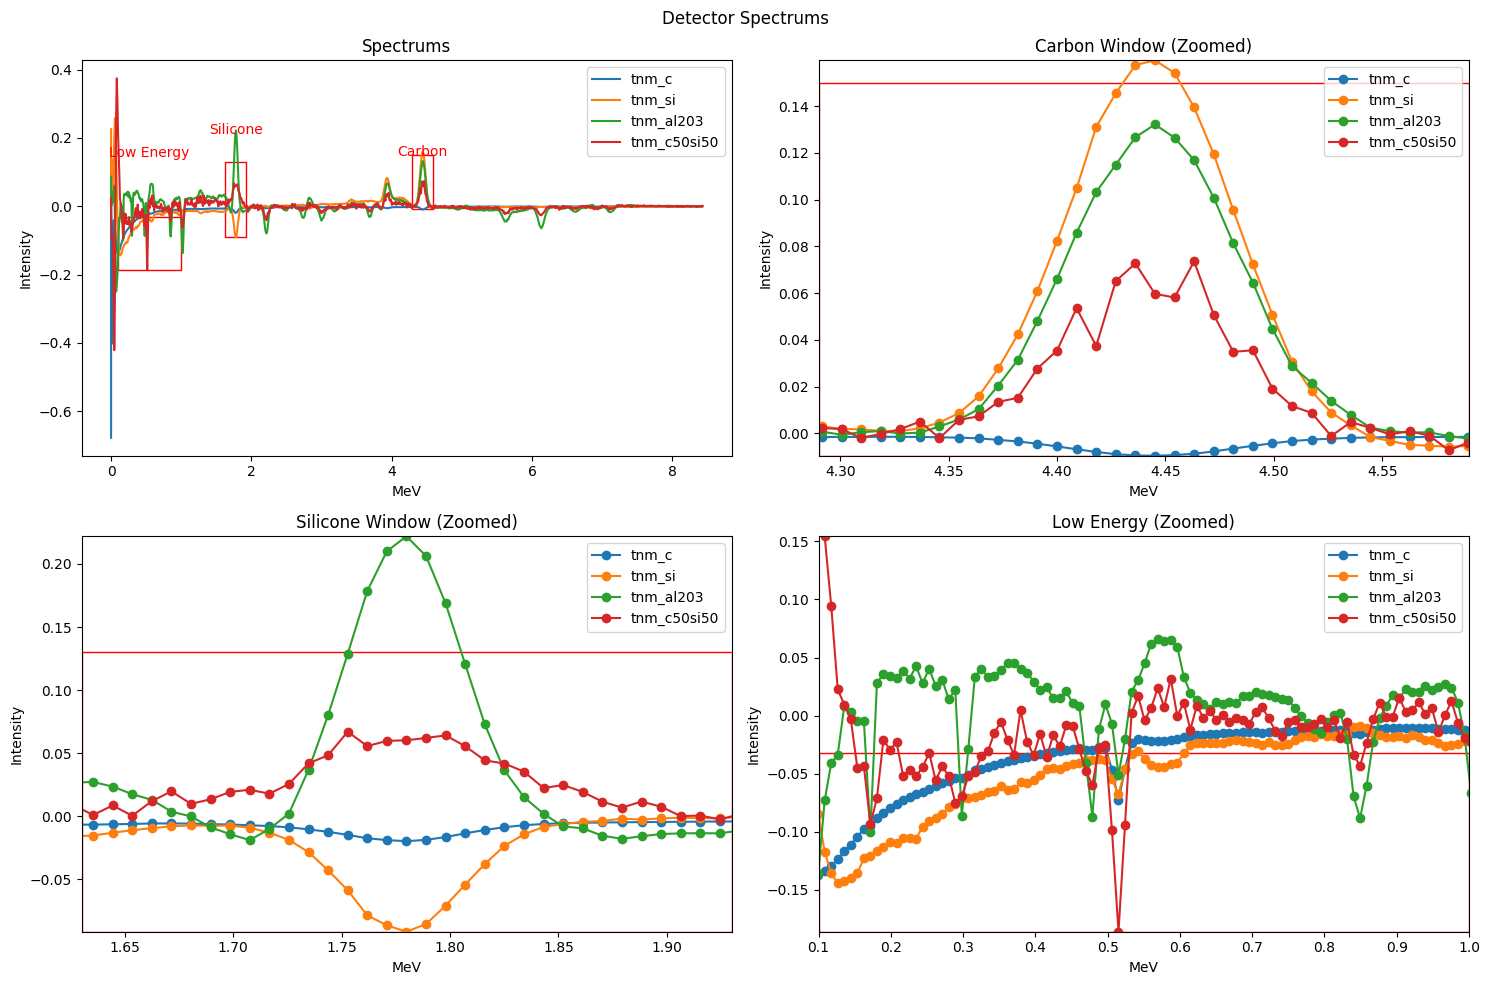

In [16]:
plott(V.reshape(V.shape[0], 1, V.shape[1]), 'Detector Spectrums')